## [1] sklearn.ensemble.AdaBoostRegressor

(Text(0.5, 0, 'data'),
 Text(0, 0.5, 'target'),
 Text(0.5, 1.0, 'Sample dataset'))

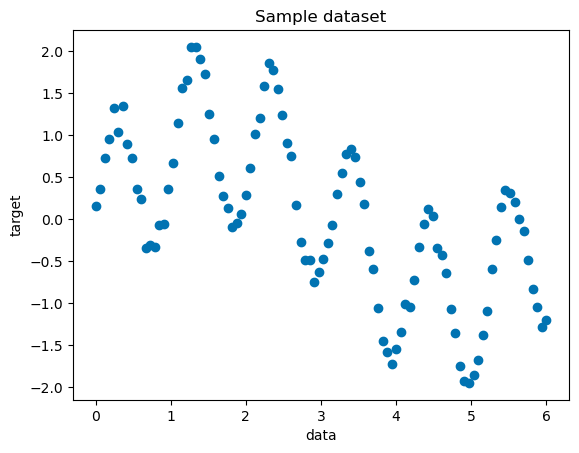

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

colors = sns.color_palette("colorblind")
plt.scatter(X, y, color=colors[0])
plt.xlabel("data"), plt.ylabel("target"), plt.title("Sample dataset")

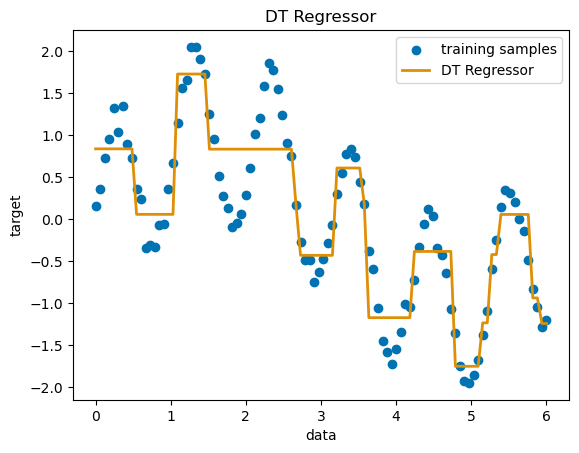

In [2]:
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=4).fit(X, y)
y_1 = regr_1.predict(X)

plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X, y_1, color=colors[1], label="DT Regressor", linewidth=2)
plt.xlabel("data"), plt.ylabel("target"), plt.title("DT Regressor"),
plt.legend()

(Text(0.5, 0, 'data'),
 Text(0, 0.5, 'target'),
 Text(0.5, 1.0, 'Adaboost'),
 <matplotlib.legend.Legend at 0x2a4bd79ff90>)

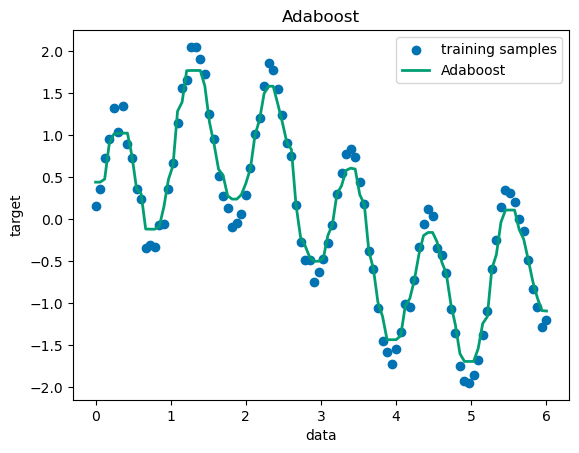

In [3]:
from sklearn.ensemble import AdaBoostRegressor

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                           n_estimators=300,
                           random_state=rng).fit(X, y)
y_2 = regr_2.predict(X)

plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X, y_2, color=colors[2], label="Adaboost", linewidth=2)
plt.xlabel("data"), plt.ylabel("target"), plt.title("Adaboost"), plt.legend()

## [2] GBT 회귀 (sklearn.ensemble.GradientBoostingRegressor)

### 직접구현

In [4]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np

df = load_diabetes(as_frame=True)['frame']
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

In [5]:
y_train2 = y_train.copy()

trees = []
for i in range(100):
    reg = DecisionTreeRegressor(max_depth=4, 
                                random_state=1234).fit(X_train, y_train2)
    y_pred = reg.predict(X_train)
    y_train2 = y_train2 - y_pred
    trees.append(reg)

In [6]:
y_pred = np.zeros(len(y_test))
for tree in trees:
    y_pred += tree.predict(X_test)

print(f'테스트 데이터셋 기준 MAE:{(np.abs(y_pred-y_test)).mean(): .2f}')

테스트 데이터셋 기준 MAE: 54.28


### GradientBoostingRegressor 패키지 활용

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(n_estimators=100,
                                random_state=1234)
y_pred = reg.fit(X_train, y_train).predict(X_test)

print(f'GradientBoostingRegressor 테스트 데이터셋 기준 MAE:{(np.abs(y_pred - y_test)).mean(): .2f}')

y_pred = DecisionTreeRegressor(random_state=1234).fit(X_train,
                                                      y_train).predict(X_test)
print(f'DecisionTreeRegressor 테스트 데이터셋 기준 MAE:{(np.abs(y_pred - y_test)).mean(): .2f}')

GradientBoostingRegressor 테스트 데이터셋 기준 MAE: 45.02
DecisionTreeRegressor 테스트 데이터셋 기준 MAE: 59.17


## [3] sklearn.ensemble.GradientBoostingClassifier 

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
X,y  = load_iris(return_X_y=True, as_frame=True)


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

clf = GradientBoostingClassifier(n_estimators=100,
                                random_state=1234)
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.94      0.94        17
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [ ]:
clf.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x2A4BE072D40),
        DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x2A4BE072D40),
        DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x2A4BE072D40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x2A4BE072D40),
        DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x2A4BE072D40),
        DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x2A4BE072D40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                 

## [4] GridSearchCV 로 n_estimators와 max_features 튜닝하기 (트리개수와 피처배깅 옵션 튜닝하기)

In [18]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X.iloc[0, 0] = np.nan
X.iloc[1, 0] = np.nan
X.iloc[2, 2] = np.nan
X.iloc[3, 4] = np.nan
X.iloc[4, 3] = np.nan
X.iloc[5, 1] = np.nan
X.iloc[5, 2] = np.nan


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1234)


In [19]:
n_estimators = list(np.arange(10,160,10))
max_features=['sqrt','log2',None]

In [20]:
pipeline=Pipeline(steps=[('imputer',SimpleImputer()),('scaler',StandardScaler()),('basemodel',GradientBoostingClassifier())])
param_grid={'basemodel__n_estimators':n_estimators,'basemodel__max_features':max_features}
kfold=KFold(n_splits=4, shuffle=True, random_state=1234) 
grid_search=GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=kfold )     
grid_search.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('basemodel',
                                        GradientBoostingClassifier())]),
             param_grid={'basemodel__max_features': ['sqrt', 'log2', None],
                         'basemodel__n_estimators': [10, 20, 30, 40, 50, 60, 70,
                                                     80, 90, 100, 110, 120, 130,
                                                     140, 150]})

In [21]:
print('최적 n_estimators:',grid_search.best_params_['basemodel__n_estimators'])
print('최적 max_features:',grid_search.best_params_['basemodel__max_features'])
print('최적 모델의 accuracy', grid_search.best_score_)

최적 n_estimators: 100
최적 max_features: sqrt
최적 모델의 accuracy 0.9765253041791571


In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report
y_pred = grid_search.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        55
           1       0.91      1.00      0.95        88

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143

